# Forest Fire Prediction Using Linear Regression, scikit-learn

   Variables 
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 'jan' to 'dec' 
   4. day - day of the week: 'mon' to 'sun'
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

In [ ]:
!pip install install -U scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('forestfires.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Converting, month & day columns into integers 

In [ ]:
def ind (df,column,order):
    df=df.copy()
    df[column]=df[column].apply(lambda x: order.index(x))
    return df

    
    

In [ ]:
def pr(df):
    df=df.copy()
    df= ind (df,
                column='month', 
                order=[
                    'jan',
                    'feb',
                    'mar',
                    'apr',
                    'may',
                    'jun',
                    'jul',
                    'aug',
                    'sep',
                    'oct',
                    'nov',
                    'dec'] )
    df= ind (df,
                column='day', 
                order=[
                    'sun',
                    'mon',
                    'tue',
                    'wed',
                    'thu',
                    'fri',
                    'sat',
                         ] )
    return df
   

    
              

In [ ]:
processed_data=pr(data)
processed_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,7,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,7,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,7,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,7,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
a=processed_data.drop(['area'], axis=1)

feature=['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain']


# Evaluating R-square for each Independent variables

In [ ]:
for i in feature:
    lm=LinearRegression()
    c=processed_data[[i]]
    d=processed_data['area']
    lm.fit(c,d)
    score=lm.score(c,d)
    print('R-square of',i,'is:',score)

    
lm=LinearRegression()
c=processed_data[feature]
d=processed_data['area']
lm.fit(c,d)
score=lm.score(c,d)
#score=score.sort()
print('Initial R-square of model',i,'is:',score)

# value closer to one is ideal for the model



R-square of X is: 0.004017696159530848
R-square of Y is: 0.0020136063329229126
R-square of month is: 0.0031917725127066365
R-square of day is: 0.0023386245971379616
R-square of FFMC is: 0.0016097752177044455
R-square of DMC is: 0.005328167285186924
R-square of DC is: 0.0024387029409236316
R-square of ISI is: 6.818940848307697e-05
R-square of temp is: 0.009573469341491059
R-square of RH is: 0.005703053428555482
R-square of wind is: 0.00015171530995217175
R-square of rain is: 5.425396781566505e-05
Initial R-square of model rain is: 0.02535067134925728


In [ ]:
processed_data.corr()['area'].sort_values()

RH      -0.075519
rain    -0.007366
ISI      0.008258
wind     0.012317
FFMC     0.040122
Y        0.044873
day      0.048359
DC       0.049383
month    0.056496
X        0.063385
DMC      0.072994
temp     0.097844
area     1.000000
Name: area, dtype: float64

# Close look at the effect of ISI on the model  

the y intercept is:  11.807208720691872
the slope is:  [0.11528731]


<Axes: xlabel='ISI', ylabel='area'>

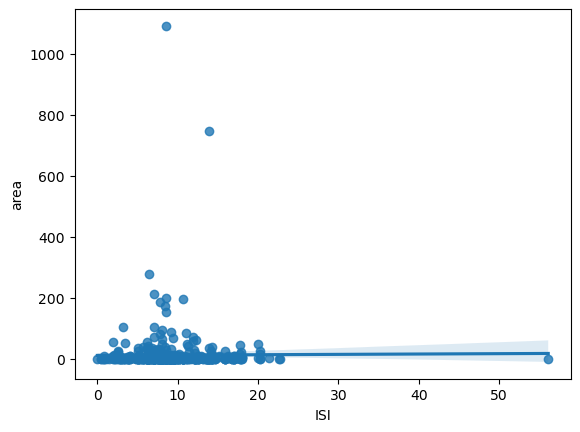

In [ ]:
#from the r-suares above, rain and ISI have the lowest scores
#create individual linear regs for each id variable and apply the function to the corresponding column and retest model 
lm=LinearRegression()
x=processed_data[['ISI']]
y=processed_data['area']
lm.fit(x,y)
print('the y intercept is: ', lm.intercept_)
print('the slope is: ', lm.coef_ )
sns.regplot(x=x,y=y,data=processed_data)

In [ ]:
#applying linearfunction to the ISI values in the data
# y=0.11528731x+11.807208720691872
processed_data['ISI']=processed_data['ISI'].apply(lambda x : 0.11528731*x + 11.807208720691872)


In [ ]:
lm=LinearRegression()
c=processed_data[feature]
d=processed_data['area']
lm.fit(c,d)
score=lm.score(c,d)
print('R-square of modified ISI column',i,'is:',score)

R-square of modified ISI column rain is: 0.02535067134925728


# Close look at the effect of rain on the model

In [ ]:
lm=LinearRegression()
x=processed_data[['rain']]
y=processed_data['area']
lm.fit(x,y)
print('the y intercept is: ', lm.intercept_)
print('the slope is: ', lm.coef_ )
sns.regplot(x=x,y=y,data=processed_data)

SyntaxError: incomplete input (3122970753.py, line 7)

In [ ]:
processed_data['rain']=processed_data['rain'].apply(lambda x : -1.58424422*x + 12.881612253841306)
processed_data

In [ ]:
lm=LinearRegression()
c=processed_data[feature]
d=processed_data['area']
lm.fit(c,d)
score=lm.score(c,d)
print('R-square of modified rain on model is:',score)

# Evaluating  DMC 

In [ ]:
# we'll next try to see how DMC can affect the r-square
lm=LinearRegression()
x=processed_data[['DMC']]
y=processed_data['area']
lm.fit(x,y)
print('the y intercept is: ', lm.intercept_)
print('the slope is: ', lm.coef_ )


In [ ]:
processed_data['DMC']=processed_data['DMC'].apply(lambda x : 0.07254905*x + 4.803608705221178)
processed_data

In [ ]:
lm=LinearRegression()
c=processed_data[feature]
d=processed_data['area']
lm.fit(c,d)
score=lm.score(c,d)
print('R-square of model of modified DMC is:',score)

# Model Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.30, random_state=1)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
r=Ridge(alpha=0.1)
r.fit(x_train,y_train)
print(r.score(x_test,y_test))

0.02292997327405555
